# Crime Rates in Chicago using Time Series Modeling Techniques

### Abstract
This report analyzes the "Crimes in Chicago" dataset from Kaggle to gain insights into the reported crimes in Chicago over the past from 2010 to 2022. The report begins with a dataset from the platform and presents an overview of the trendings regarding the crimes, including the crime types, locations, and time of occurrence. The report also examines the relationship between the crimes and various factors such as time, demographics, and socioeconomic indicators.

Next, the report explores the data using various visualization techniques such as histograms, bar charts, and heat maps to understand the patterns and trends of crime in Chicago. The report also conducts statistical analyses to identify the most common crimes, the areas with the highest crime rates, and the time periods with the highest incidence of crimes.

Finally, the report concludes by discussing the implications of these findings and suggests some areas for further research. The report emphasizes the importance of data analysis in understanding and addressing crime issues in Chicago and highlights the potential of using data-driven approaches to develop effective crime prevention and reduction strategies.

# 1. Objective
The objective of this report is to analyze the "Crimes in Chicago" dataset to gain insights into the reported crimes in Chicago from 2010 to 2022. The report aims to identify the most common crimes, the areas with the highest crime rates, and the time periods with the highest incidence of crimes. The report also explores the relationship between the crimes and various factors such as weather, demographics, and socioeconomic indicators.

### Dataset
The dataset used in this report is the “Crimes in Chicago Dataset”. The dataset contains information on the reported crimes in Chicago and is provided and maintained by the Chicago Police Department (CPD) CLEAR (Citizen Law Enforcement Analysis and Reporting) system. The dataset reflects reported incidents of crime (except murders where data exists for each victim) that occurred in Chicago from 2001 to the present, minus the most recent seven days. In order to maintain data consistency, historical data from 2010 to 2022 is used for this analysis.

# 2. Data Preprocessing
Data preprocessing is an essential step in data analysis that involves cleaning and transforming raw data into a format suitable for analysis. The main objective of data preprocessing is to improve the quality of data, remove inconsistencies and errors, and make the data easier to analyze.

The methodology for data preprocessing typically involves several steps, including data cleaning, data transformation, and data reduction. Data cleaning involves removing or correcting missing values, outliers, and inconsistencies. Data transformation involves converting data into a more suitable format for analysis, such as scaling or normalizing numerical data, or encoding categorical data. Data reduction involves reducing the size of the dataset by selecting a subset of relevant features or observations.

In [63]:
# reads crime data from 12 csv files, concatenates them into a single dataframe
#removes duplicates, and outputs the final dataset ready for analysis.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

# we will skip 2001 - 2005 due to bad quality

# Create an empty list to store the DataFrames for each year
crimes_list = []

# Loop through the years 2010 to 2022 (inclusive)
for year in range(2010, 2023):
    # Create a string with the file name for the current year
    file_name = f'/kaggle/input/crimes-in-chicago/{year}.csv'
    # Read the CSV file for the current year into a DataFrame
    df = pd.read_csv(file_name, error_bad_lines=False)
    # Append the DataFrame to the list
    crimes_list.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
crimes = pd.concat(crimes_list, ignore_index=False, axis=0)

# Delete the list of DataFrames to save memory
del crimes_list

# Print a message indicating that the dataset is ready
print('Dataset ready..')

# Print the shape of the DataFrame before dropping duplicates
print('Dataset Shape before drop_duplicate : ', crimes.shape)

# Drop duplicates based on the 'ID' and 'Case Number' columns
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

# Print the shape of the DataFrame after dropping duplicates
print('Dataset Shape: ', crimes.shape)


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Dataset ready..
Dataset Shape before drop_duplicate :  (3608150, 22)
Dataset Shape:  (3608150, 22)


In [64]:
#dropping specific columns from the "crimes" dataframe in-place, effectively removing those columns from the dataset.
crimes.drop([ 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

In [65]:
#Let's have a look at the first 3 records and see if we see what we expect
crimes.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,11039140,01/01/2010 12:00:00 AM,055XX W FARRAGUT AVE,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,16.0,NaN,NaN,NaN,NaN
1,10342825,01/01/2010 12:00:00 AM,056XX W EASTWOOD AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,16.0,1137897.0,1930354.0,41.965032,-87.768376
2,10938629,01/01/2010 12:00:00 AM,043XX N MONTICELLO AVE,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,17.0,NaN,NaN,NaN,NaN


In [66]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [67]:
#replacing the least frequent values in the "Location Description" and "Description" columns 
#with "OTHER" to simplify and reduce the number of unique values.
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'

In [68]:
# Convert those 3 columns into 'Categorical' types
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

In [69]:
print(crimes.index)

# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               ...
               '2022-12-07 23:40:00', '2022-12-07 23:40:00',
               '2022-12-07 23:45:00', '2022-12-07 23:49:00',
               '2022-12-07 23:49:00', '2022-12-07 23:50:00',
               '2022-12-07 23:51:00', '2022-12-07 23:52:00',
               '2022-12-07 23:58:00', '2022-12-07 23:59:00'],
              dtype='datetime64[ns]', name='Date', length=3608150, freq=None)


In [70]:
#several pivot tables to analyze the crime data based on different variables such as location, time of day, day of week, and crime type. 
#These pivot tables provide useful insights into how crime is distributed across different variables and can help identify patterns and trends.

days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

#The first pivot table, hour_by_location, counts the number of crimes that occur in each location for each hour of the day. 
hour_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

#The second pivot table, hour_by_type, counts the number of crimes of each type that occur for each hour of the day.
hour_by_type     = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

#The third pivot table, hour_by_week, counts the number of crimes that occur for each hour of the day for each day of the week. 
hour_by_week     = crimes.pivot_table(values='ID', index=crimes.index.hour, columns=crimes.index.day_name(), aggfunc=np.size).fillna(0)
hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days

#The fourth pivot table, dayofweek_by_location, counts the number of crimes that occur in each location for each day of the week. 
dayofweek_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)

#The fifth pivot table, dayofweek_by_type, counts the number of crimes of each type that occur for each day of the week. 
dayofweek_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)

#The final pivot table, location_by_type, counts the number of crimes of each type that occur in each location. 
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

# 3. Data Exploratory

# 3.1 Crimes Overview

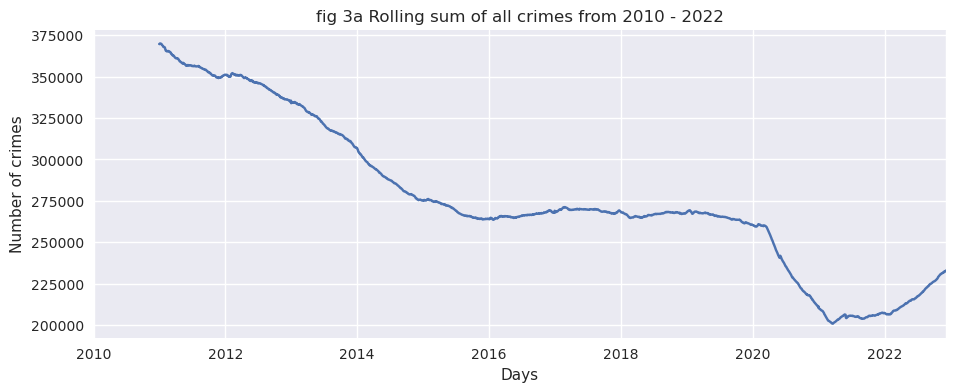

In [71]:
#the rolling sum of all crimes reported in Chicago from 2010 to 2022, with a rolling window of 365 days.
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('fig 3a Rolling sum of all crimes from 2010 - 2022')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

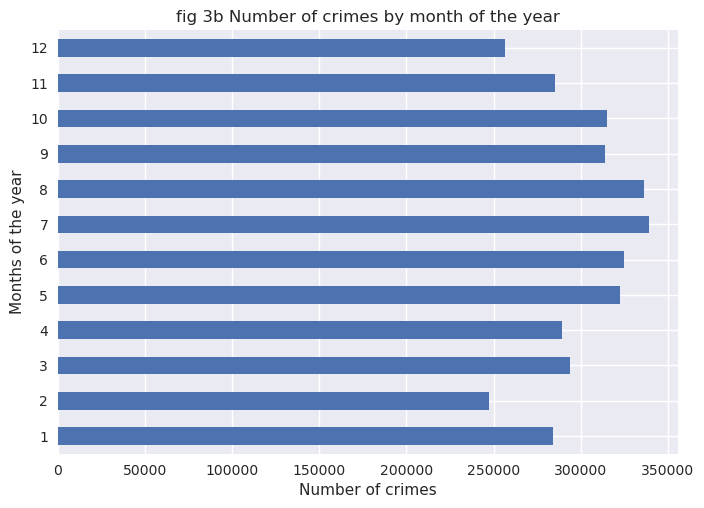

In [72]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('fig 3b Number of crimes by month of the year')
plt.show()

Figure 3a shows a gradual decrease in crime rates from 2010 to 2022. The rolling sum decreased from 370,000 per year in 2010 to 200,000 per month in 2021. The monthly base counts of crimes follow a similar pattern, with occasional surges in certain months. Figure 3b indicates that the crime rate reaches its minimum level in February, gradually increases until July and August where it reaches its maximum, and then decreases until February of the following year. This reflects seasonal factors that affect crime prevalence.
Overall, these findings suggest a trend of decreasing crime rates over time with some fluctuations in specific months.

# 3.2 Most Frequently Occurred Crimes Type

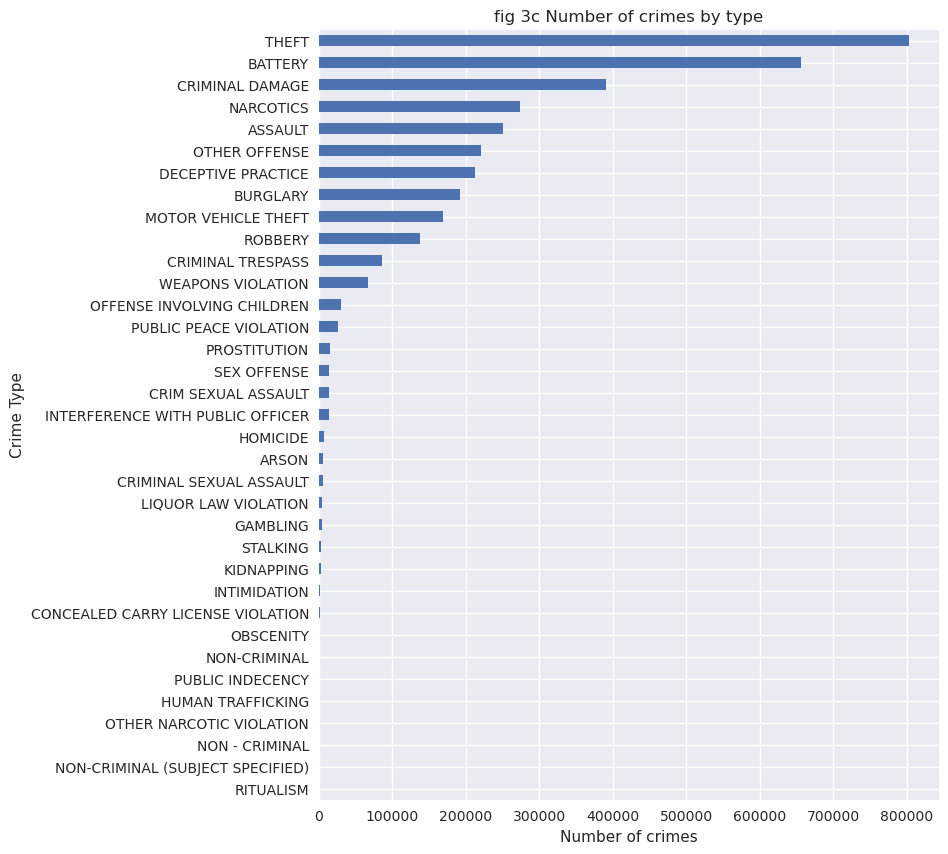

In [73]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('fig 3c Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

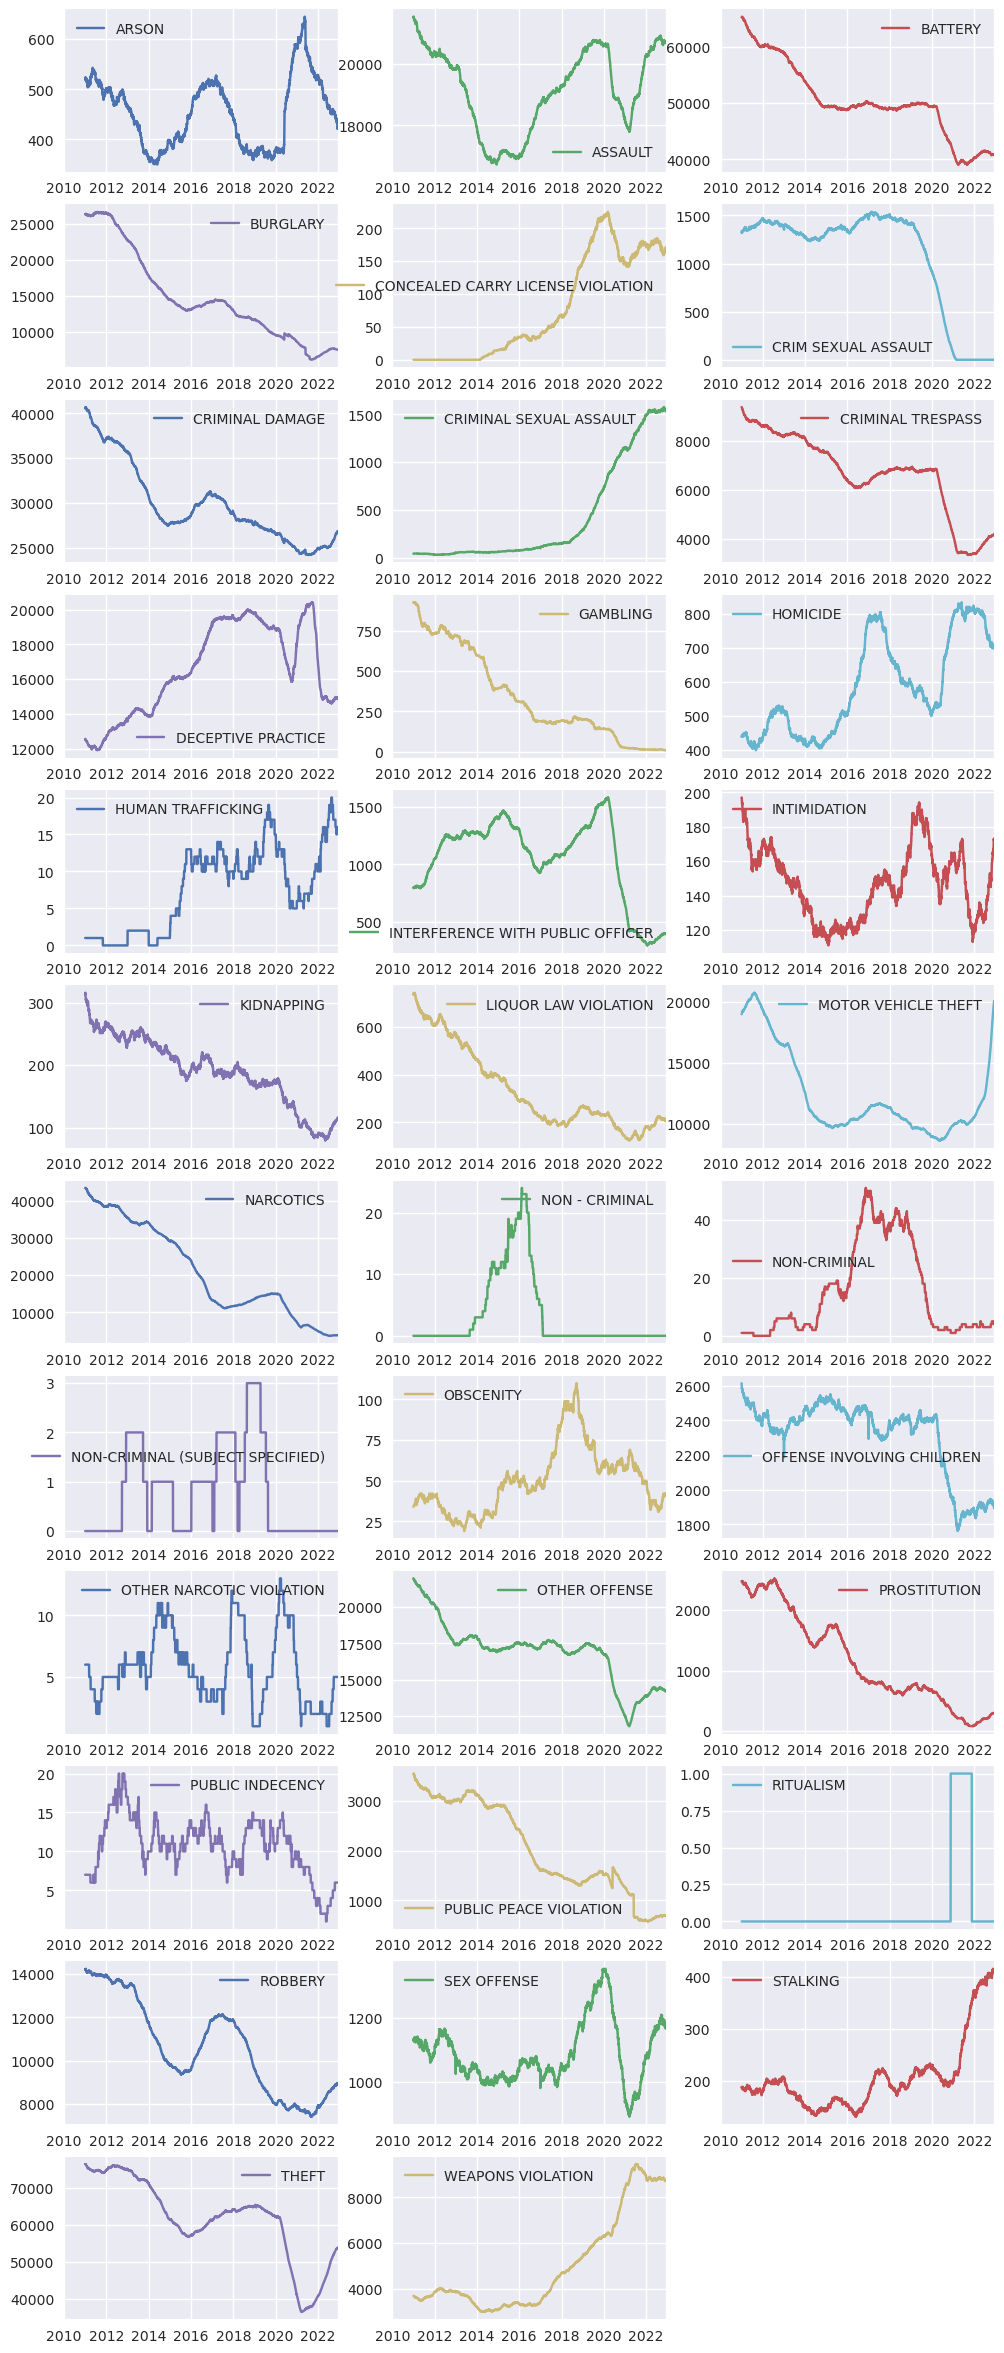

In [74]:
#creates a pivot table with the count of crimes for each primary type on a daily basis,
#then plots the rolling sum of crimes for each primary type over time in a 3-column layout using subplots.
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

From Figure 3c, it indicates that theft, battery, and criminal damage are the most frequent crimes in the dataset. All these three types exceed 300,000 in total counts, which highlights their significance among the crimes in Chicago.

Figure 3d displays notable patterns and trends for specific crimes. Theft shows a fluctuating pattern, decreasing from 2010 to 2016, rising from 2016 to 2019, and then decreasing again from 2019 to 2021 before suddenly surging in 2022. Battery displays a more stable pattern, dropping from 2010 to 2014, remaining steady from 2015 to 2020, and falling from 2021 to 2022. Criminal damage also shows a fluctuating pattern similar to theft, decreasing from 2010 to 2015, increasing from 2015 to 2017, decreasing again from 2017 to 2021, and rising from 2021 to 2022. 

There are several reasons behind these crime rising observations from 2015 to 2018. First, there are several mass demonstrations like Shooting of Dallas incidents (ALEXANDER and DAVID, 2016) across the country including Chicago. Some of the demonstrating events led to violent incidents with destructions and crimes. For others, Violence Reduction Units in Chicago received less funds from 2015 to 2017 (Daley, 2022). Those reasons might had worsen the situation and caused more crimes in Chicago.

# 3.3 Crime Scenes 

In [75]:
#The scale_df function scales numerical values in a given DataFrame to have a mean of zero and a unit variance. 
#The plot_hmap function plots a heatmap that visualizes temporal patterns in a given DataFrame. 
#The scale_and_plot function uses scale_df and plot_hmap to scale the values of a DataFrame and then plot a heatmap that shows temporal patterns.
#The normalize function normalizes numerical values in a given DataFrame to have a range of [0, 1]. 

from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.values), np.abs(np.min(df_marginal_scaled.values))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

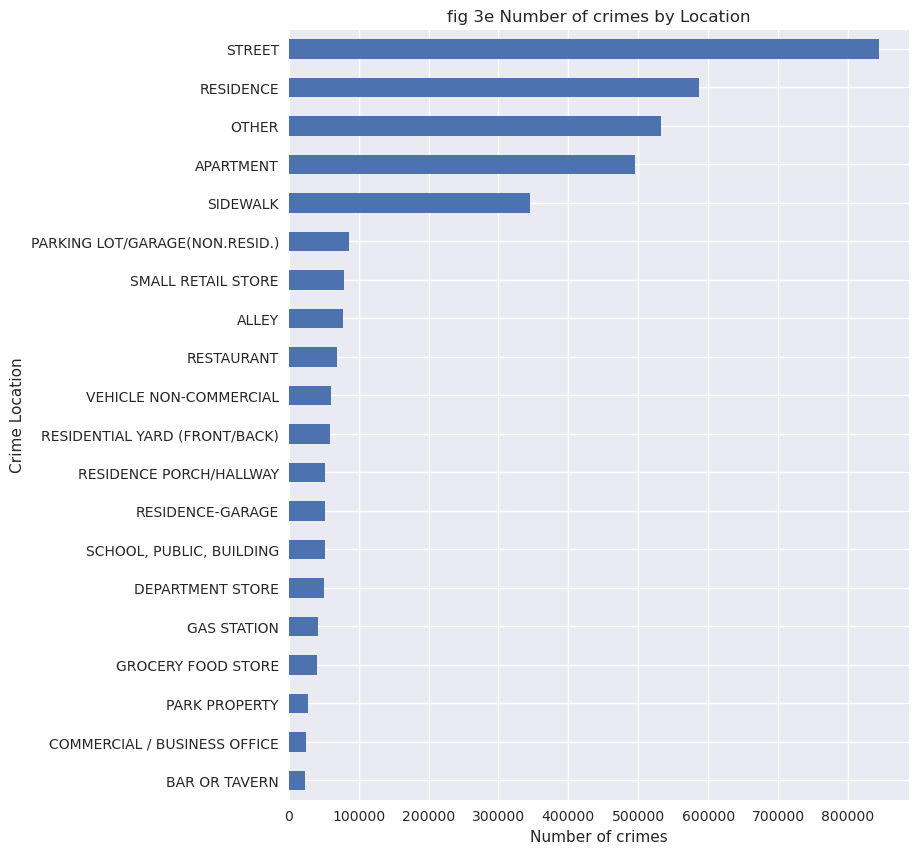

In [76]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('fig 3e Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

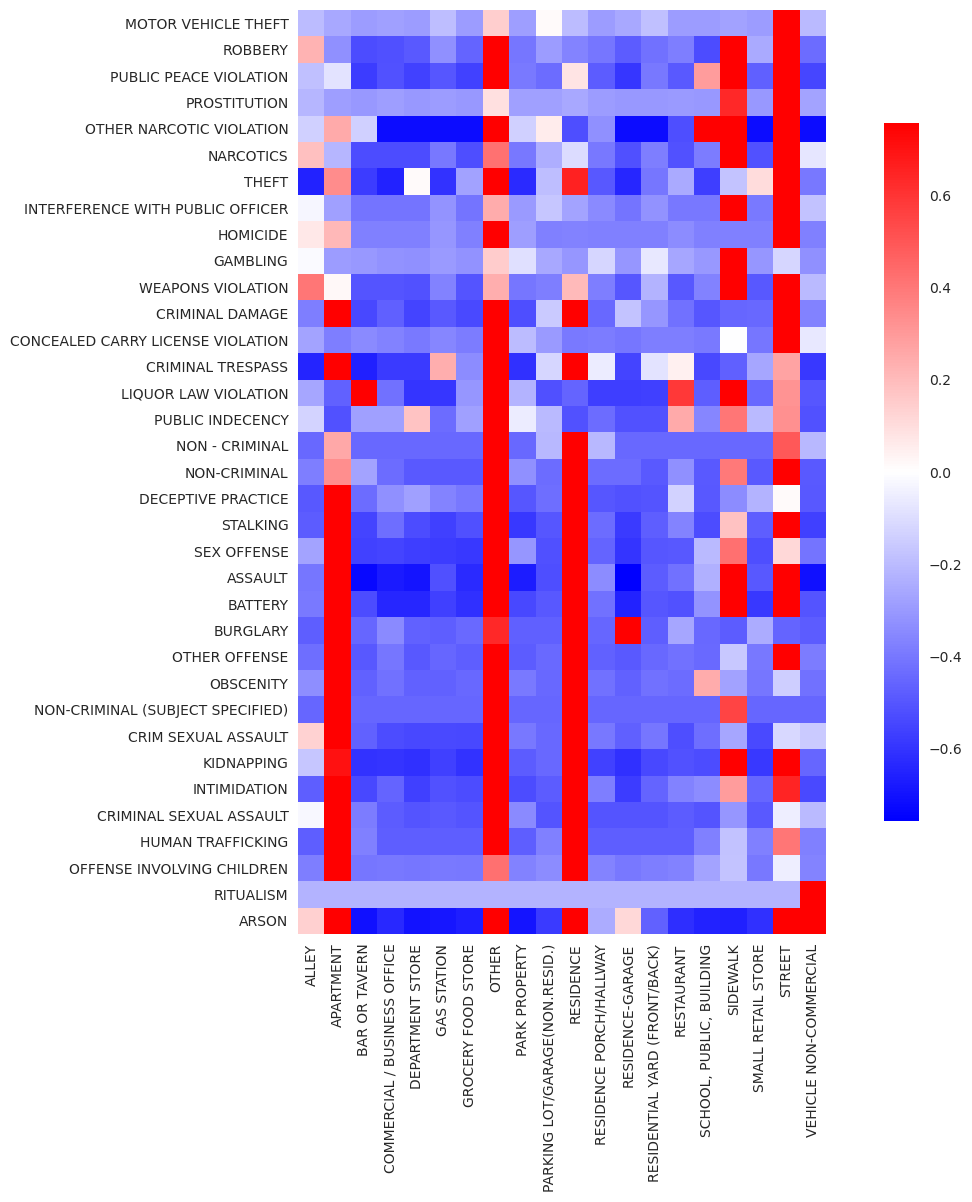

In [77]:
#fig 3f Correlation between crime types and crime scene
plt.figure(figsize=(15,12))
plt.xticks(np.arange(location_by_type.shape[0]), location_by_type.index, rotation='vertical')
scale_and_plot(location_by_type.T)

The majority of crimes occur in four main crime scenes, including streets, residences, sidewalks, and apartments, as reflected in figure 3f. These places reflect the routines of people's live, work, and socialization. For example, battery tends to occur on sidewalks and streets due to the opportunities for physical conflicts in public spaces, whereas theft tends to occur in apartments and residences because offenders prefer to commit crimes in real properties.

However, some crimes tend to occur outside of these crime scenes, such as ritualism, which tends to occur in Vehicle Non-Commercial. This indicates different motivations or opportunities for criminals.

In summary, the analysis of data reveals patterns and variations in the crime scene of crimes in the dataset. While the majority of crimes occur in streets, residences, sidewalks, and apartments, some types of crime exhibit different location patterns. Additionally, consistent crime scene patterns for some types of crime may help identify hotspots.

# 3.4 Relationship of Crimes, Day of Week and Time

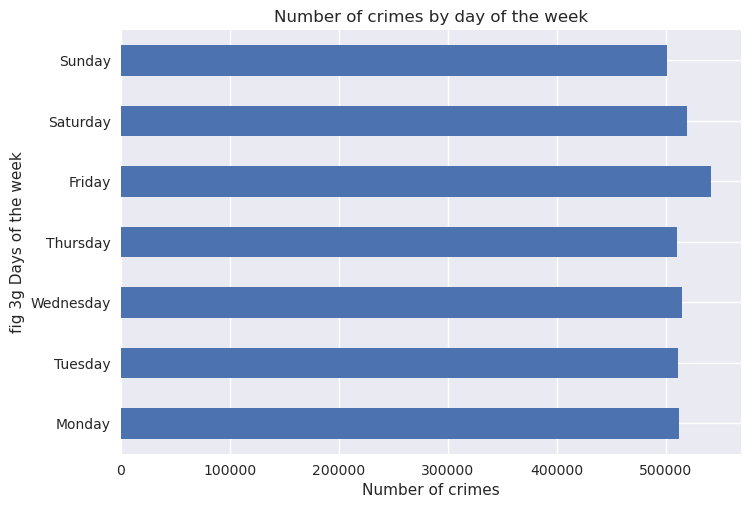

In [78]:
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('fig 3g Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

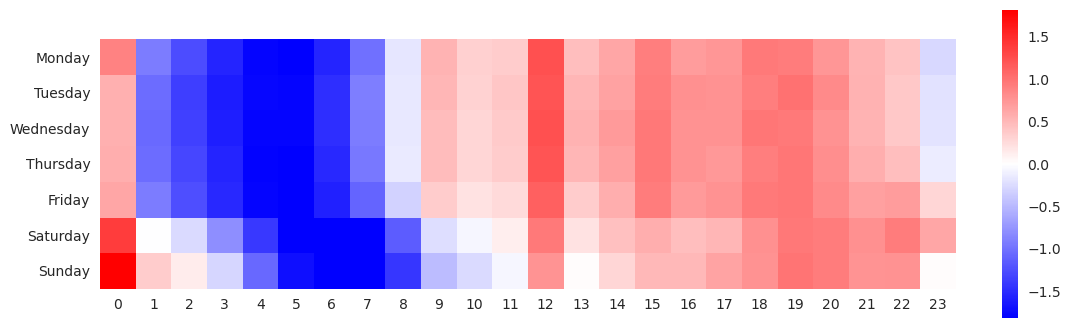

In [79]:
#fig 3h Correlation between number of crimes and day of week

plt.figure(figsize=(12,4))
scale_and_plot(hour_by_week, ix=np.arange(7))


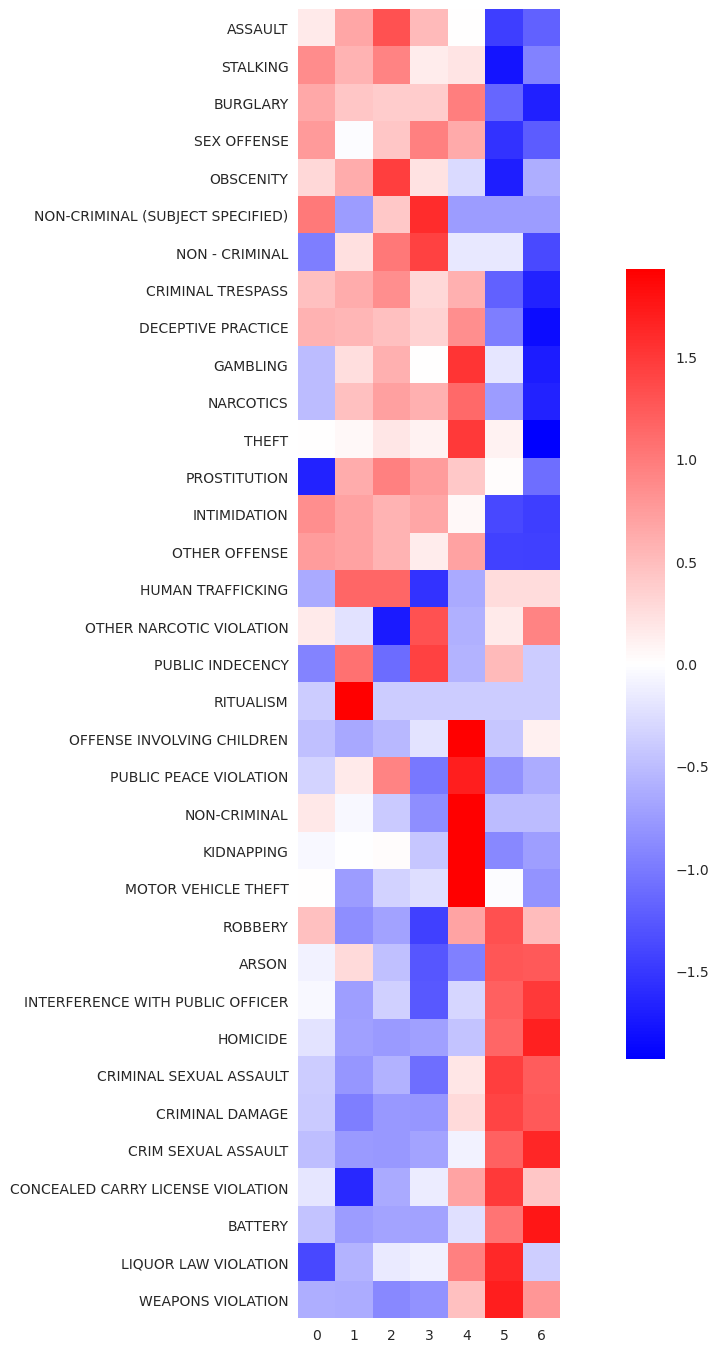

In [80]:
#fig 3i Correlation between crimes type and day of week 

plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type)

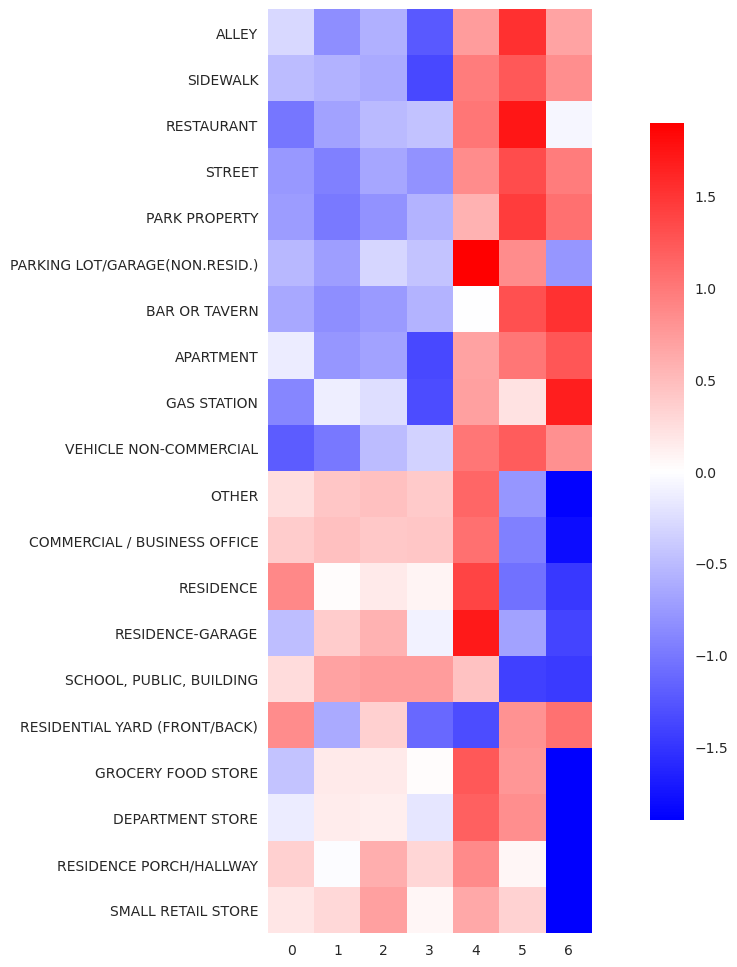

In [81]:
#Figure 3j: Correlation between crime scene and days of week

plt.figure(figsize=(15,12))
scale_and_plot(dayofweek_by_location)

Besides, the figure 3i also shows some differences in the types of crimes committed across the weeks. During the weekdays, crimes such as assault, stalking and burglary tend to be more frequent. On the contrary, crimes such as arson, homicide, criminal damage, and battery tend to be more frequent during the weekends.

Moreover, in places like schools and business offices, crimes are more frequent on weekdays but the less frequent on weekends. In contrast, the number of crimes in Bar of Traverns as well as gas station concentrates in the weekends but less likely happen in weekdays.

To summarize, this data reveals some patterns in the timing and types of crimes committed across the weeks. While Fridays tend to have more crimes than other days, the data also shows differences in crime occurrence and types between weekdays and weekends.


# 3.5 Relationship of Crimes, Time and Crime Scene

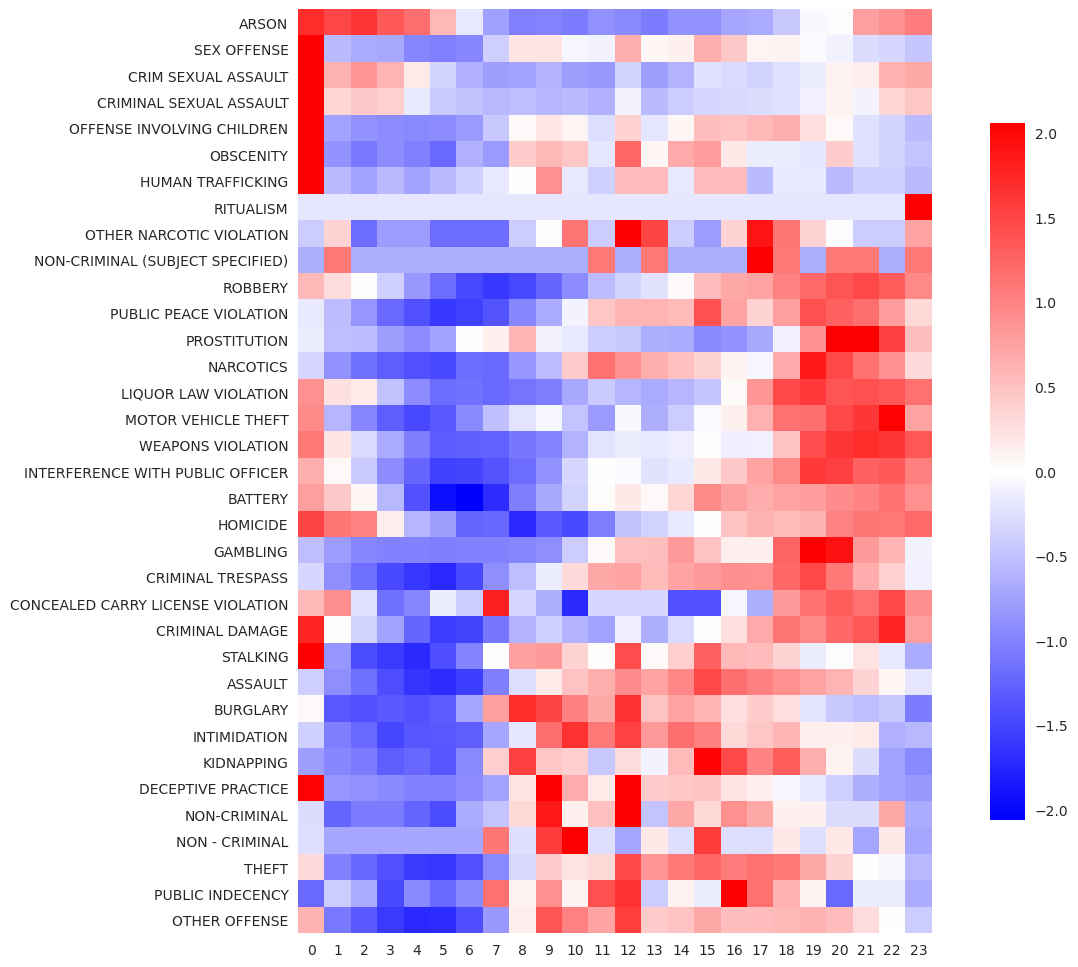

In [82]:
# Figure 3k: Correlation between crime types and time
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

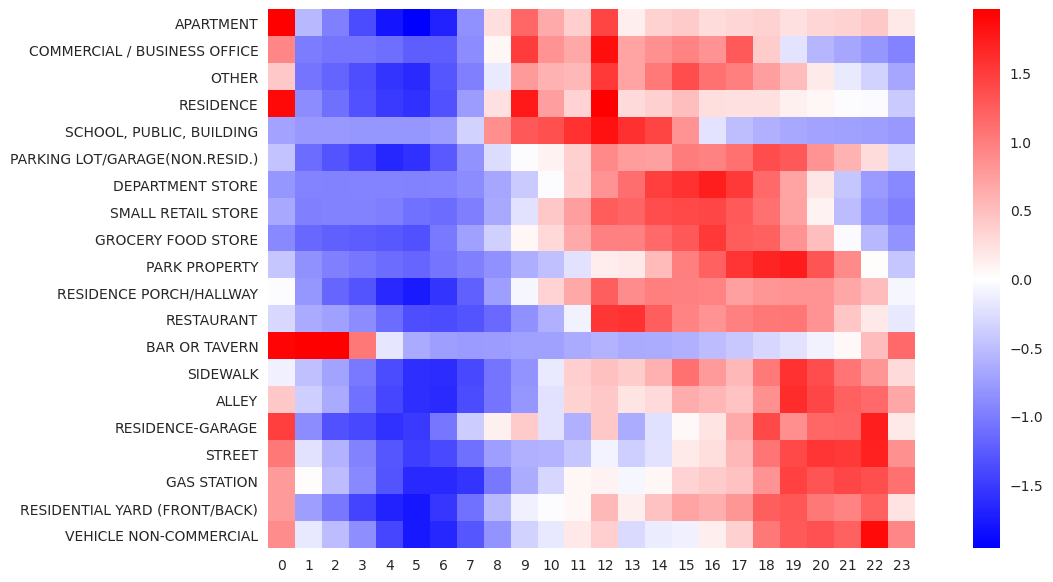

In [83]:
# Figure 3l: Correlation between crime scene of crimes and time
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

In addition, the data reveals that the timing and crime scenes are interrelated. According to figure 3.1k, crimes are usually more frequent from 8 a.m. to 12 p.m. In specific, crimes usually happen in schools, business offices from mornings, and department stores as well as restaurants from noons. While in the evenings, crimes tend to be more frequent on sidewalks, streets, and gas stations. 
Moreover, some crimes such as arson and homicide are relatively active at midnight. These crimes tend to occur more frequently in bars or taverns, which may be associated with alcohol. However, the types of crimes and the scenes did not show a clear relationship with arson or homicides from figure 3.1f.
In short, although most of the crimes tend to be more frequent during the daytime and evening hours, some crimes, such as homicides and arson, are active in the locations where people are active in midnights. 


# 3.6 Crimes by Geographic Location

In [92]:
crimes.iloc[(crimes[['Longitude']].values < -88.0).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Longitude']].values > -87.5).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values < 41.60).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values > 42.05).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.replace({'Latitude': 0.0, 'Longitude': 0.0}, np.nan, inplace=True)
crimes.dropna(inplace=True)

In [ ]:
import seaborn as sns

#Figure 3m: Correlation between crimes and geographic location
crimes_new = crimes[(crimes['Primary Type'] == 'SEX OFFENSE') | (crimes['Primary Type'] == 'HOMICIDE') | (crimes['Primary Type'] == 'ARSON')]
ax = sns.lmplot(x='Longitude', y='Latitude',
                data= crimes_new[['Longitude','Latitude']],
                fit_reg=False,
                height=7,
                scatter_kws={'alpha':.1})

    
ax = sns.kdeplot(data=crimes_new[['Longitude','Latitude']],
                 cmap="jet", 
                 bw_adjust=.005,
                 #n_levels=10,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False)
ax.set_xlim(-87.9,-87.5)
ax.set_ylim(41.60,42.05)
#ax.set_axis_off()

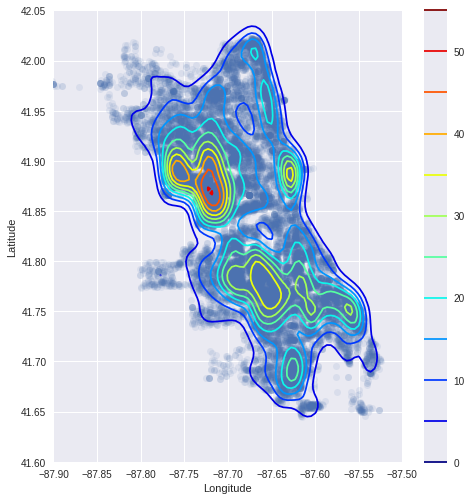

In [ ]:
#Figure 3n: Correlation between each type of  crime and Geographic location

ctypes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'HOMICIDE', 'ARSON', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'STALKING', 'INTIMIDATION']
fig = plt.figure(figsize=(15,35))
for i, crime_type in enumerate(ctypes):
    ax = fig.add_subplot(int(np.ceil(float(len(ctypes)) / 4)), 4, i+1)
    crimes_ = crimes[crimes['Primary Type']==crime_type]
    sns.regplot('Longitude', 'Latitude',
               data= crimes_[['Longitude','Latitude']],
               fit_reg=False,
               scatter_kws={'alpha':.1, 'color':'grey'},
               ax=ax)
    sns.kdeplot(X='Longitude', Y='Latitude',
                data= crimes_[['Longitude','Latitude']],
                cmap="jet", 
                bw=.005,
                #n_levels=10,
                cbar=True, 
                shade=True, 
                shade_lowest=False,
                ax = ax)
    ax.set_title(crime_type)
    ax.set_xlim(-87.9,-87.5)
    ax.set_ylim(41.60,42.05)
    ax.set_axis_off()    
plt.show()

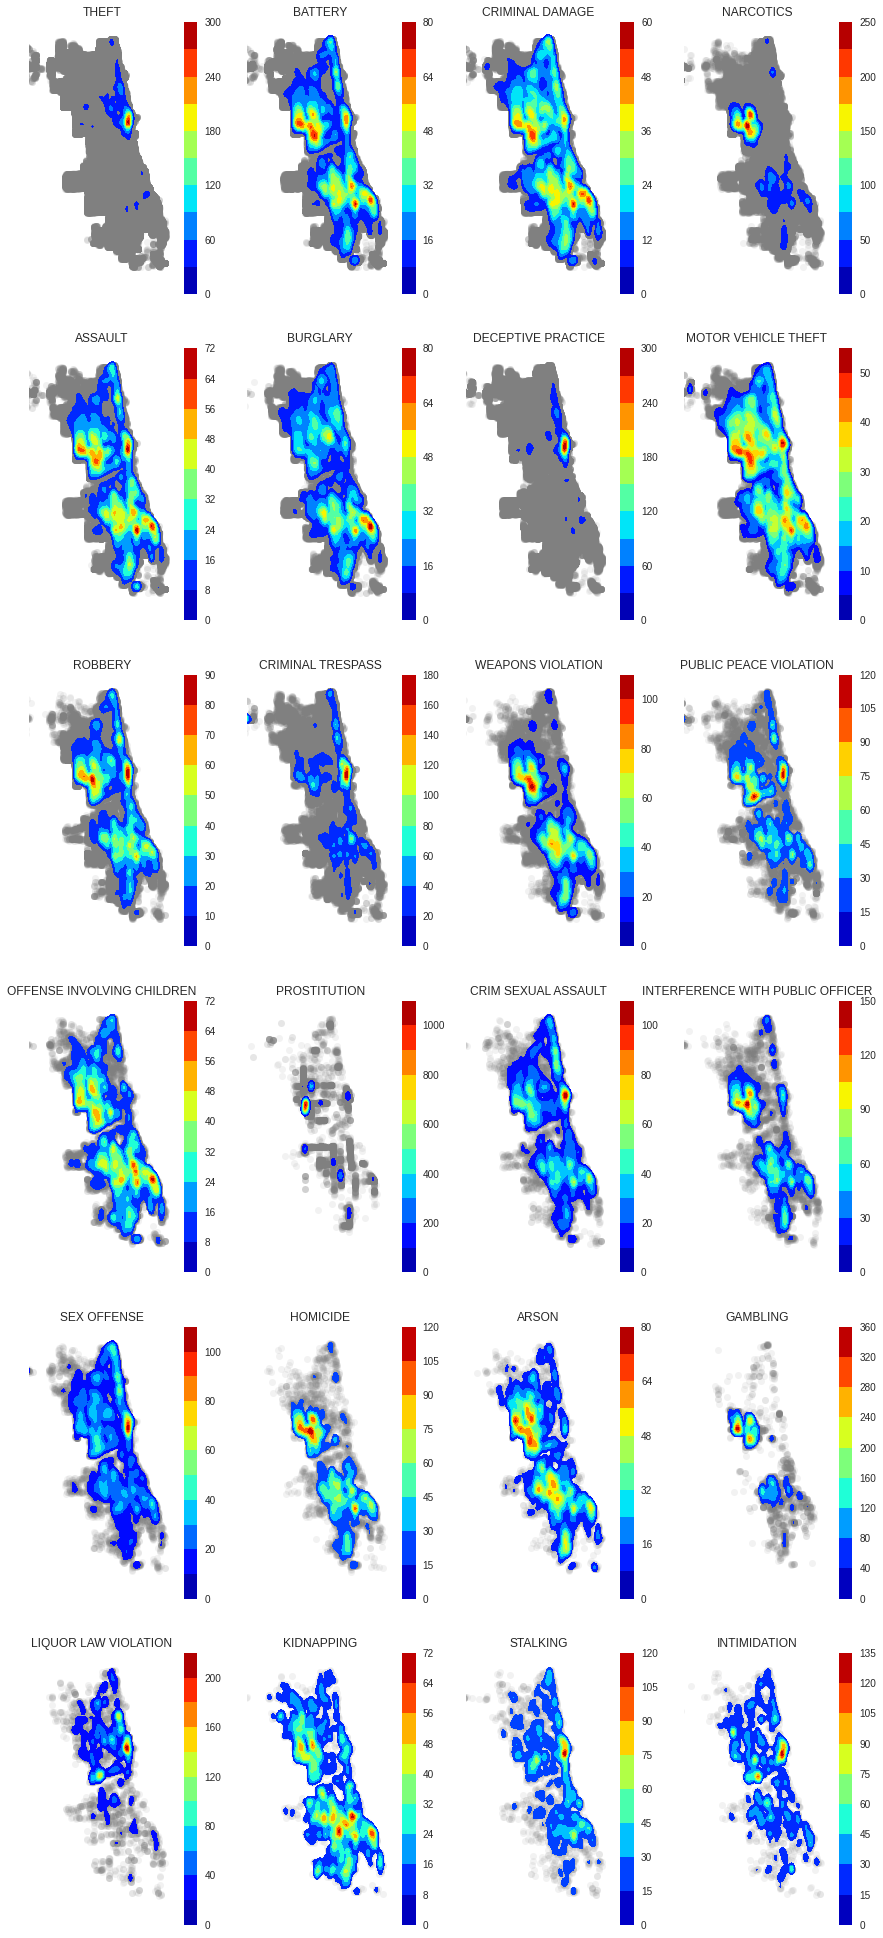

According to figure 3.1m and Figure 3.1n, most of crimes occur in the northwest and lower half parts of Chicago. Nevertheless, some crimes happen in other parts of the city. Particularly, thefts and deceptive practices tend to be more frequent in the northeast part as shown in figure 3.1o. These two crimes behave significantly differently from other crimes. 

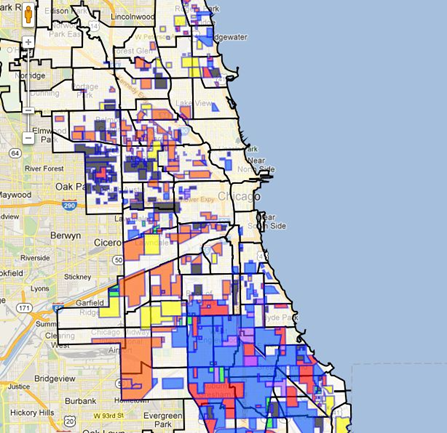

Figure 3.1p: Gangs territories in Chicago (Jaffe, 2012)

To better understand the relationship between crimes and geographical location in Chicago, the frequency of crimes and gangs territories are mapped out. As reflected in figure 3p, it becomes clear that some of the crimes could be related to gang activity. Crimes including weapons violations, gambling, and homicides are more prevalent in the northwest and lower half parts of Chicago. It is also important that these areas have higher crime rates compared to other districts with fewer gangsters.

# 4. Conclusion
In conclusion, this report has leveraged data analytics and modeling techniques to provide in understanding the crimes in Chicago by by analyzing the "Crimes in Chicago" dataset. Moreover, we have identified different relations including day of week, time, crime scene and geographic locations with the crime patterns, as well as suggested some of the underlying reasons.

By examining these additional techniques, we hope to identify a more accurate and robust model for crime rate forecasting, which can further assist decision-makers in developing effective strategies to address crime-related issues.

Reference:

Daley, J. (2022, January 26). State Budget Impasse linked to 2016 homicide spike. Chicago Reader. Retrieved April 3, 2023, from https://chicagoreader.com/news-politics/state-budget-impasse-linked-to-2016-homicide-spike/ 

MALLIN, ALEXANDER., & CAPLAN, DAVID (n.d.). President Obama Describes Dallas Shootings As 'Vicious, Calculated, Despicable Attack'. ABC News. Retrieved April 3, 2023, from https://abcnews.go.com/US/president-obama-receiving-regular-updates-dallas-shooting/story?id=40425624 

